# Split Data

In [ ]:
import os

BASE_PATH = "/content/drive/MyDrive/Split_Skin"
new_classes = ["Normal", "Other"]

for split in ["train", "val", "test"]:
    for cls in new_classes:
        os.makedirs(os.path.join(BASE_PATH, split, cls), exist_ok=True)

print("Folder Normal & Other berhasil dibuat")

Folder Normal & Other berhasil dibuat


In [ ]:
import os, random, shutil

SRC_PATH = "/content/drive/MyDrive/Skin_Conditions/new"
DST_PATH = "/content/drive/MyDrive/Split_Skin"

SPLIT = {
    "train": 279,
    "val": 59,
    "test": 61
}

for cls in ["Normal", "Other"]:
    images = os.listdir(os.path.join(SRC_PATH, cls))
    images = [img for img in images if img.lower().endswith((".jpg", ".png", ".jpeg"))]

    random.shuffle(images)

    idx = 0
    for split, count in SPLIT.items():
        dst_dir = os.path.join(DST_PATH, split, cls)
        for img in images[idx:idx+count]:
            shutil.copy(
                os.path.join(SRC_PATH, cls, img),
                os.path.join(dst_dir, img)
            )
        idx += count

    print(f"{cls} selesai dibagi")

Normal selesai dibagi
Other selesai dibagi


# Info GPU

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec 21 21:40:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

DATASET_PATH = "/content/drive/MyDrive/Split_Skin"

splits = ["train", "val", "test"]

for split in splits:
    print(f"\n=== {split} SET ===")
    split_path = os.path.join(DATASET_PATH, split)
    classes = os.listdir(split_path)

    for cls in classes:
        class_path = os.path.join(split_path, cls)
        count = len(os.listdir(class_path))
        print(f"{cls:20} : {count} files")


=== train SET ===
Keratosis            : 279 files
Eczema               : 279 files
Acne                 : 279 files
Carcinoma            : 279 files
Milia                : 279 files
Rosacea              : 279 files
Normal               : 279 files
Other                : 279 files

=== val SET ===
Keratosis            : 59 files
Eczema               : 59 files
Acne                 : 59 files
Carcinoma            : 59 files
Milia                : 59 files
Rosacea              : 59 files
Normal               : 59 files
Other                : 59 files

=== test SET ===
Keratosis            : 61 files
Eczema               : 61 files
Acne                 : 61 files
Carcinoma            : 61 files
Milia                : 61 files
Rosacea              : 61 files
Normal               : 61 files
Other                : 61 files


In [ ]:
import sys
print("Python version:", sys.version)


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
import torch
import torchvision
import sklearn
import numpy as np
import matplotlib
import seaborn
from PIL import Image

print("PyTorch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("Scikit-learn:", sklearn.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", seaborn.__version__)
print("Pillow (PIL):", Image.__version__)


PyTorch: 2.9.0+cu126
Torchvision: 0.24.0+cu126
Scikit-learn: 1.6.1
NumPy: 2.0.2
Matplotlib: 3.10.0
Seaborn: 0.13.2
Pillow (PIL): 11.3.0


# EDA

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# 1. Fungsi untuk hitung jumlah gambar per kelas

def count_images(folder_path):
    class_counts = {}

    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            total = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith((".jpg", ".jpeg", ".png"))
            ])
            class_counts[class_name] = total
    return class_counts

In [ ]:
# 2. Hitung jumlah tiap split

base_path = "/content/drive/MyDrive/Split_Skin"

train_counts = count_images(os.path.join(base_path, "train"))
val_counts   = count_images(os.path.join(base_path, "val"))
test_counts  = count_images(os.path.join(base_path, "test"))

print("Train:", train_counts)
print("Val:", val_counts)
print("Test:", test_counts)

Train: {'Keratosis': 279, 'Eczema': 279, 'Acne': 279, 'Carcinoma': 279, 'Milia': 279, 'Rosacea': 279, 'Normal': 279, 'Other': 279}
Val: {'Keratosis': 59, 'Eczema': 59, 'Acne': 59, 'Carcinoma': 59, 'Milia': 59, 'Rosacea': 59, 'Normal': 59, 'Other': 59}
Test: {'Keratosis': 61, 'Eczema': 61, 'Acne': 61, 'Carcinoma': 61, 'Milia': 61, 'Rosacea': 61, 'Normal': 61, 'Other': 61}


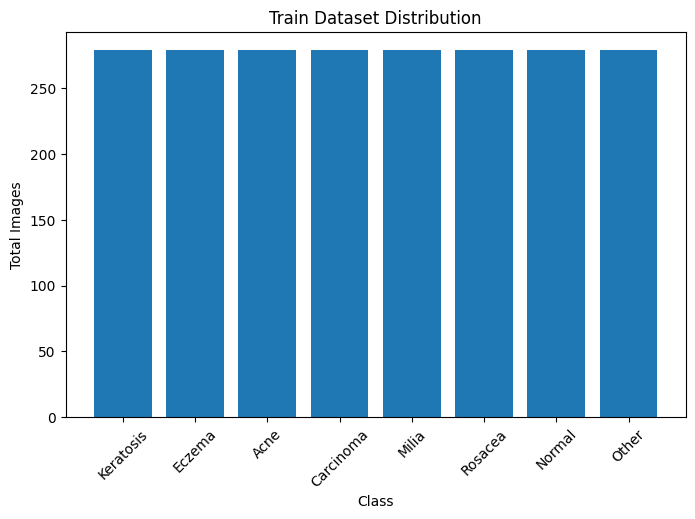

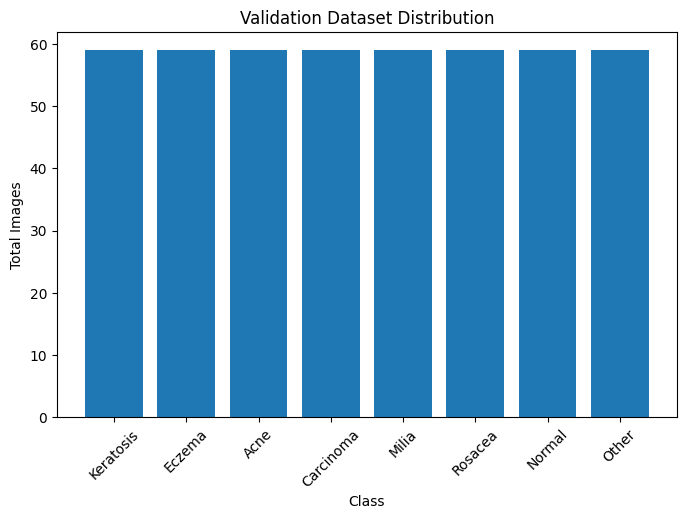

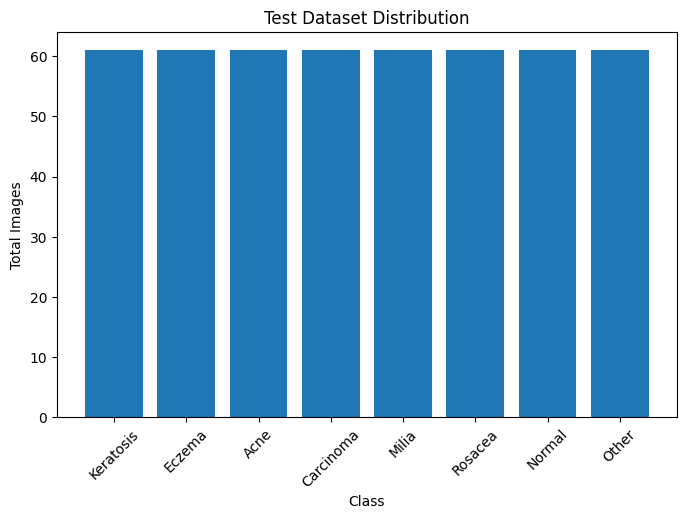

In [ ]:
# 3. Visualisasi bar chart jumlah data per kelas
def plot_bar(data_dict, title):
    plt.figure(figsize=(8, 5))
    plt.bar(data_dict.keys(), data_dict.values())
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Total Images")
    plt.xticks(rotation=45)
    plt.show()

plot_bar(train_counts, "Train Dataset Distribution")
plot_bar(val_counts, "Validation Dataset Distribution")
plot_bar(test_counts, "Test Dataset Distribution")

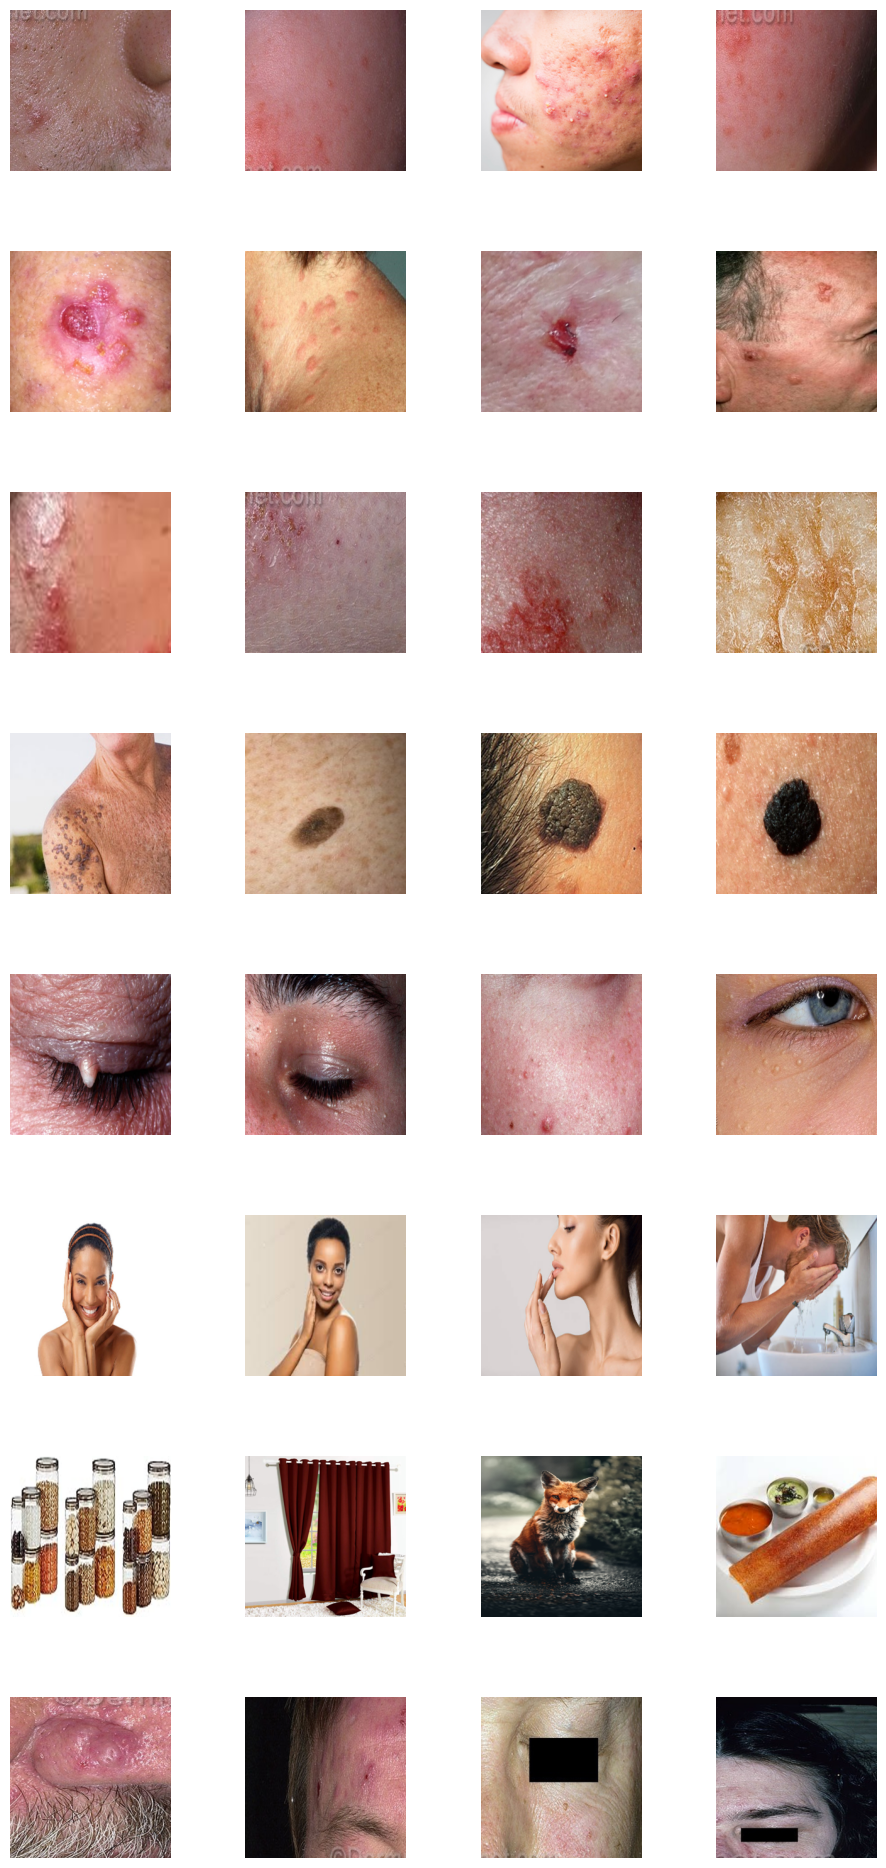

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def show_layout_like_paper(folder_path, images_per_class=4, image_size=256):
    class_names = sorted(os.listdir(folder_path))
    class_names = [c for c in class_names if os.path.isdir(os.path.join(folder_path, c))]

    num_classes = len(class_names)

    # Buat figure: tinggi = num_classes * 3, lebar = images_per_class * 3
    fig, axes = plt.subplots(num_classes, images_per_class, figsize=(images_per_class*3, num_classes*3))

    # Jika hanya 1 kelas, axes akan 1D, ubah menjadi 2D agar konsisten
    if num_classes == 1:
        axes = [axes]

    for row_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(folder_path, class_name)
        images = [f for f in os.listdir(class_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
        sample_imgs = random.sample(images, min(images_per_class, len(images)))

        for col_idx in range(images_per_class):
            ax = axes[row_idx, col_idx] if num_classes > 1 else axes[col_idx]
            ax.axis("off")

            if col_idx < len(sample_imgs):
                img_path = os.path.join(class_dir, sample_imgs[col_idx])
                img = Image.open(img_path).resize((image_size, image_size))
                ax.imshow(img)

    plt.subplots_adjust(hspace=0.5, wspace=0.05)
    plt.show()

# Contoh penggunaan
base_dir = "/content/drive/MyDrive/Split_Skin"
show_layout_like_paper(os.path.join(base_dir, "train"))


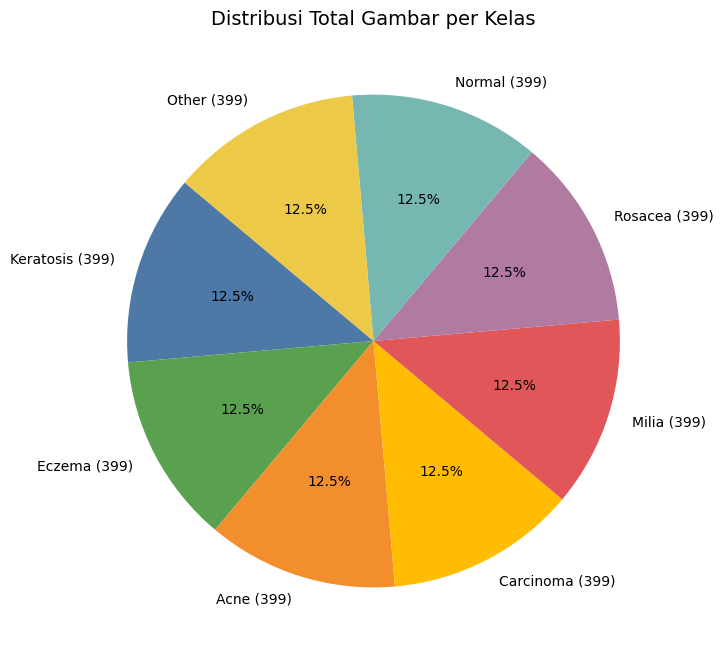

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
from collections import defaultdict

base_path = "/content/drive/MyDrive/Split_Skin"
subsets = ["train", "val", "test"]
colors = ['#4E79A7', '#59A14F', '#F28E2B', '#ffbc00', '#E15759', '#B07AA1', '#76B7B2', '#EDC948']

total_per_kelas = defaultdict(int)

for subset in subsets:
    subset_path = os.path.join(base_path, subset)
    for folder in os.listdir(subset_path):
        folder_path = os.path.join(subset_path, folder)
        if os.path.isdir(folder_path):
            total_per_kelas[folder] += len(os.listdir(folder_path))

kelas = list(total_per_kelas.keys())
jumlah = list(total_per_kelas.values())

labels = [f"{k} ({j})" for k, j in zip(kelas, jumlah)]

plt.figure(figsize=(8,8))
plt.pie(jumlah, labels=labels, colors=colors[:len(jumlah)], startangle=140, autopct='%1.1f%%')
plt.title('Distribusi Total Gambar per Kelas', fontsize=14)
plt.show()

# Model MobileNetV2 Pytorch

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import MobileNet_V2_Weights

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATASET_PATH = "/content/drive/MyDrive/Split_Skin"

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 1e-4

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(8),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [ ]:
train_data = datasets.ImageFolder(os.path.join(DATASET_PATH, "train"), transform=train_transforms)
val_data   = datasets.ImageFolder(os.path.join(DATASET_PATH, "val"),   transform=val_transforms)
test_data  = datasets.ImageFolder(os.path.join(DATASET_PATH, "test"),  transform=val_transforms)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(train_data.classes)
print("Classes:", train_data.classes)

Classes: ['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Normal', 'Other', 'Rosacea']


In [ ]:
from torchvision.models import MobileNet_V2_Weights

def get_mobilenetv2(num_classes):
    model = models.mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)

    # Freeze backbone
    for param in model.features.parameters():
        param.requires_grad = False

    # Unfreeze 4 layer terakhir
    for param in model.features[-4:].parameters():
        param.requires_grad = True

    # Replace classifier
    model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)

    return model.to(device)

model = get_mobilenetv2(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=EPOCHS, eta_min=1e-6
)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 138MB/s]


In [ ]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_acc = 0.0

save_path = "/content/drive/MyDrive/Split_Skin/Model/Skin_MobileNetV2.pth"

start_time = time.time()

for epoch in range(EPOCHS):

    # Train
    model.train()
    running_loss, running_corrects, total_train = 0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += (outputs.argmax(1) == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / total_train
    train_acc = running_corrects / total_train

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_corrects, total_val = 0, 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_corrects += (outputs.argmax(1) == labels).sum().item()
            total_val += labels.size(0)

    val_loss /= total_val
    val_acc = val_corrects / total_val

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Save Best
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"Model Saved! Best val_acc = {best_val_acc:.4f}")

    scheduler.step()

    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2%} "
          f"|| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2%}")

end_time = time.time()
print(f"\nTotal Training Time: {end_time - start_time:.2f} seconds")

Model Saved! Best val_acc = 0.7818
Epoch [1/100] Train Loss: 1.6207 | Train Acc: 57.71% || Val Loss: 1.0401 | Val Acc: 78.18%
Model Saved! Best val_acc = 0.8729
Epoch [2/100] Train Loss: 0.7855 | Train Acc: 81.72% || Val Loss: 0.5162 | Val Acc: 87.29%
Model Saved! Best val_acc = 0.8856
Epoch [3/100] Train Loss: 0.4532 | Train Acc: 87.59% || Val Loss: 0.3620 | Val Acc: 88.56%
Model Saved! Best val_acc = 0.9131
Epoch [4/100] Train Loss: 0.3358 | Train Acc: 90.73% || Val Loss: 0.2797 | Val Acc: 91.31%
Model Saved! Best val_acc = 0.9153
Epoch [5/100] Train Loss: 0.2683 | Train Acc: 91.76% || Val Loss: 0.2442 | Val Acc: 91.53%
Model Saved! Best val_acc = 0.9280
Epoch [6/100] Train Loss: 0.2162 | Train Acc: 93.91% || Val Loss: 0.2117 | Val Acc: 92.80%
Model Saved! Best val_acc = 0.9364
Epoch [7/100] Train Loss: 0.1893 | Train Acc: 94.31% || Val Loss: 0.1927 | Val Acc: 93.64%
Model Saved! Best val_acc = 0.9386
Epoch [8/100] Train Loss: 0.1595 | Train Acc: 95.43% || Val Loss: 0.1929 | Val Acc:

In [ ]:
model.load_state_dict(torch.load(save_path))
model.eval()

all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        all_preds.extend(outputs.argmax(1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

test_acc = (all_preds == all_labels).mean()
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 97.75%


In [ ]:
from sklearn.metrics import classification_report

print("\n Classification Report")
print(classification_report(all_labels, all_preds, target_names=train_data.classes, digits=4))


 Classification Report
              precision    recall  f1-score   support

        Acne     0.9516    0.9672    0.9593        61
   Carcinoma     0.9683    1.0000    0.9839        61
      Eczema     0.9661    0.9344    0.9500        61
   Keratosis     1.0000    0.9836    0.9917        61
       Milia     1.0000    0.9836    0.9917        61
      Normal     0.9839    1.0000    0.9919        61
       Other     1.0000    1.0000    1.0000        61
     Rosacea     0.9508    0.9508    0.9508        61

    accuracy                         0.9775       488
   macro avg     0.9776    0.9775    0.9774       488
weighted avg     0.9776    0.9775    0.9774       488



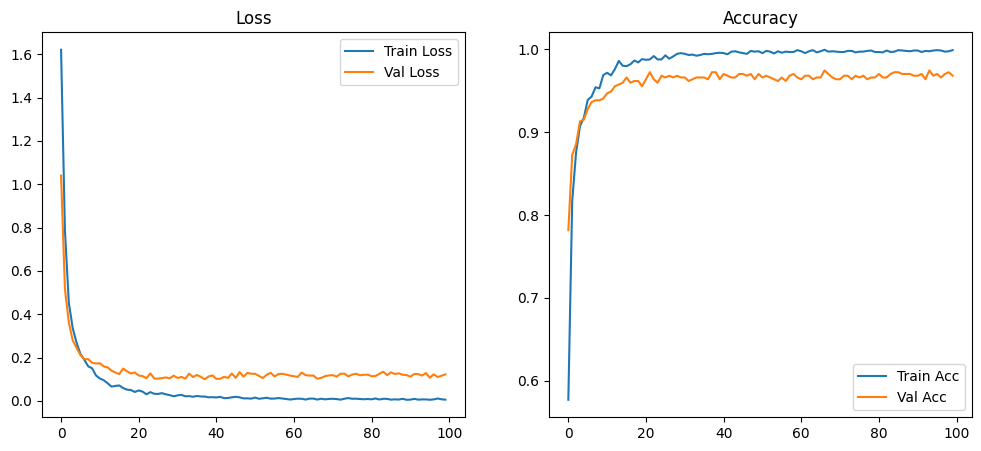

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses,label="Train Loss")
plt.plot(val_losses,label="Val Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies,label="Train Acc")
plt.plot(val_accuracies,label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.show()

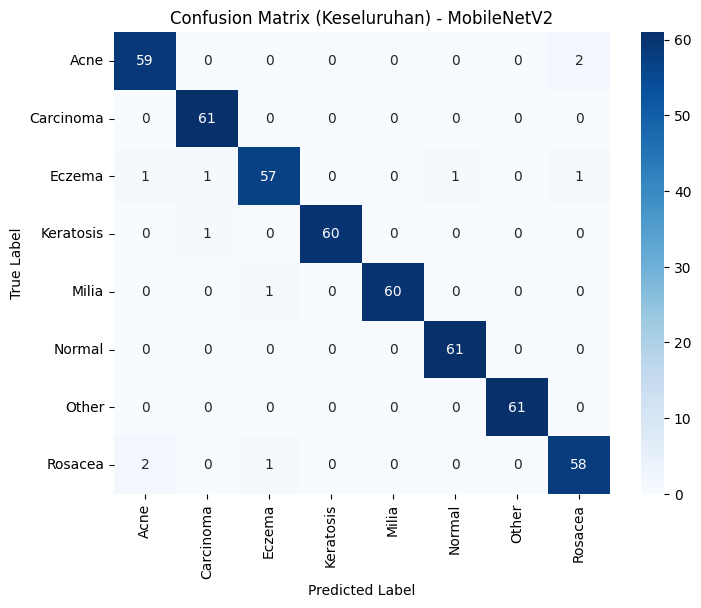

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.classes,
            yticklabels=test_data.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Keseluruhan) - MobileNetV2")
plt.show()

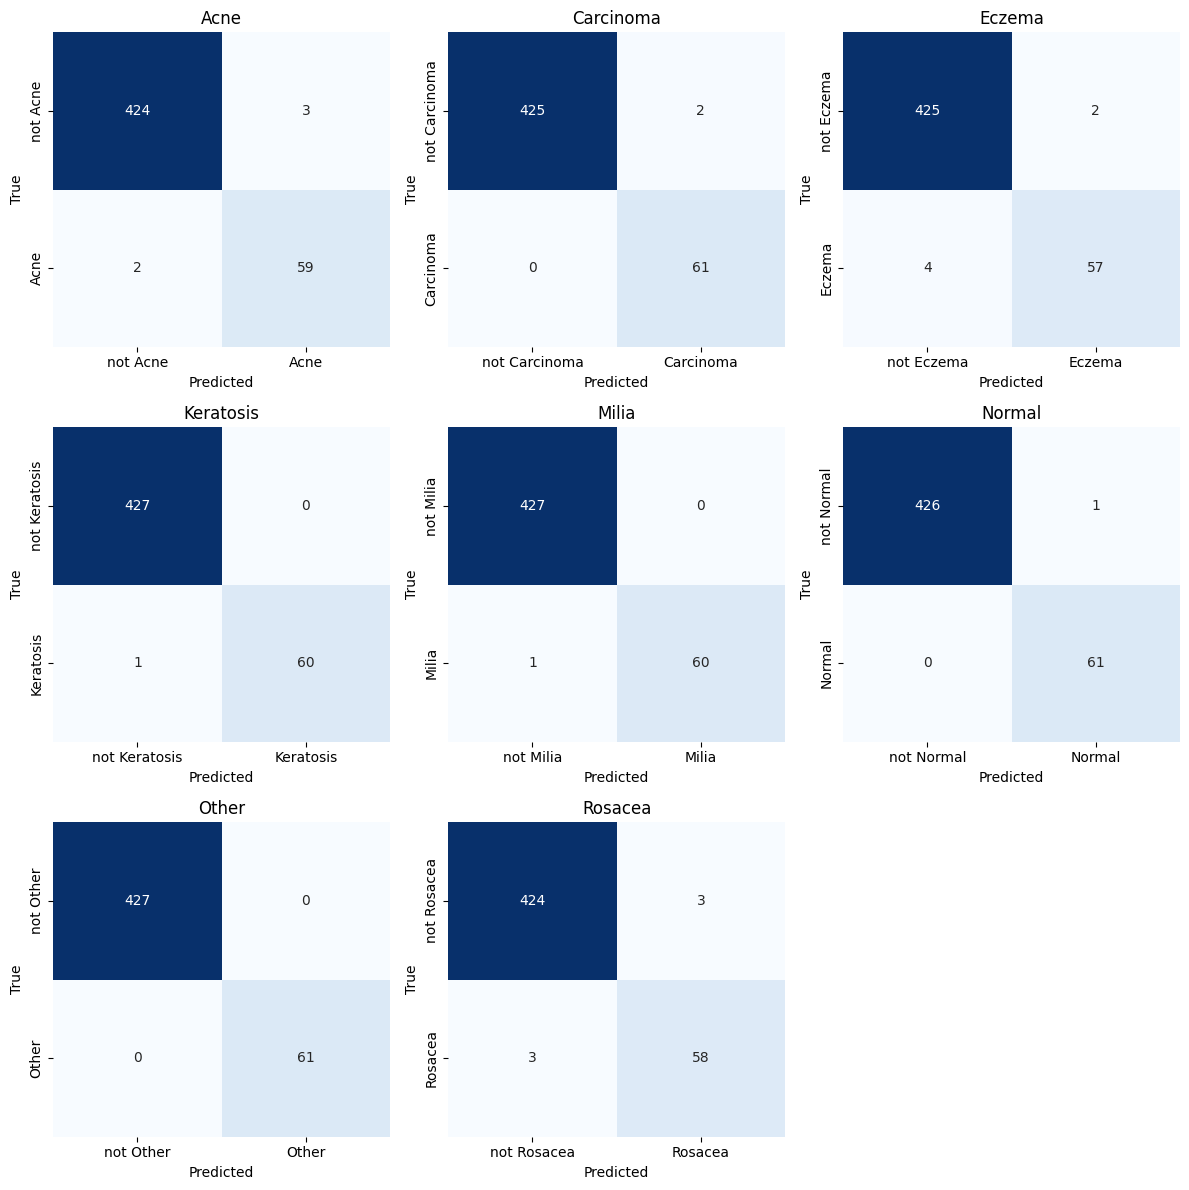

In [ ]:
num_classes = len(class_names)
cols = 3
rows = int(np.ceil(num_classes / cols))

plt.figure(figsize=(cols * 4, rows * 4))

for i, cls in enumerate(class_names):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    binary_cm = np.array([[TN, FP],
                           [FN, TP]])

    plt.subplot(rows, cols, i + 1)
    sns.heatmap(
        binary_cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=[f"not {cls}", cls],
        yticklabels=[f"not {cls}", cls]
    )
    plt.title(cls)
    plt.xlabel("Predicted")
    plt.ylabel("True")

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

model_cpu = get_mobilenetv2(num_classes)
model_cpu.load_state_dict(torch.load("/content/drive/MyDrive/Split_Skin/Model/Skin_MobileNetV2.pth", map_location="cpu"))
model_cpu.eval()
model_cpu.to("cpu")

example_input = torch.randn(1, 3, 224, 224)

traced_script = torch.jit.trace(model_cpu, example_input)
traced_script.save("/content/drive/MyDrive/Split_Skin/Model/Skin_MobileNetV2.pt")

print("TorchScript model berhasil disimpan!")

TorchScript model berhasil disimpan!


# Model EfficientNetB0 Pytorch

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATASET_PATH = "/content/drive/MyDrive/Split_Skin"

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 1e-4

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(8),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [ ]:
train_data = datasets.ImageFolder(os.path.join(DATASET_PATH, "train"), transform=train_transforms)
val_data   = datasets.ImageFolder(os.path.join(DATASET_PATH, "val"),   transform=val_transforms)
test_data  = datasets.ImageFolder(os.path.join(DATASET_PATH, "test"),  transform=val_transforms)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(train_data.classes)
print("Classes:", train_data.classes)

Classes: ['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Normal', 'Other', 'Rosacea']


In [ ]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

def get_efficientnet_b0(num_classes):
    model = efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)

    # Freeze backbone
    for param in model.features.parameters():
        param.requires_grad = False

    # Unfreeze beberapa block terakhir (fine-tuning ringan)
    for param in model.features[-3:].parameters():
        param.requires_grad = True

    # Ganti classifier
    model.classifier[1] = nn.Linear(
        model.classifier[1].in_features,
        num_classes
    )
    return model.to(device)

model = get_efficientnet_b0(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=EPOCHS, eta_min=1e-6
)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 123MB/s]


In [ ]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_acc = 0.0

save_path = "/content/drive/MyDrive/Split_Skin/Model/Skin_EfficientNetB0.pth"

start_time = time.time()

for epoch in range(EPOCHS):

    # Train
    model.train()
    running_loss, running_corrects, total_train = 0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += (outputs.argmax(1) == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / total_train
    train_acc = running_corrects / total_train

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Valid
    model.eval()
    val_loss, val_corrects, total_val = 0, 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_corrects += (outputs.argmax(1) == labels).sum().item()
            total_val += labels.size(0)

    val_loss /= total_val
    val_acc = val_corrects / total_val

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"Model Saved! Best val_acc = {best_val_acc:.4f}")

    scheduler.step()

    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2%} "
          f"|| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2%}")

end_time = time.time()
print(f"\nTotal Training Time: {end_time - start_time:.2f} seconds")

Model Saved! Best val_acc = 0.8220
Epoch [1/100] Train Loss: 1.4542 | Train Acc: 62.32% || Val Loss: 0.7491 | Val Acc: 82.20%
Model Saved! Best val_acc = 0.9089
Epoch [2/100] Train Loss: 0.5692 | Train Acc: 86.02% || Val Loss: 0.3299 | Val Acc: 90.89%
Model Saved! Best val_acc = 0.9492
Epoch [3/100] Train Loss: 0.3119 | Train Acc: 91.62% || Val Loss: 0.2113 | Val Acc: 94.92%
Model Saved! Best val_acc = 0.9597
Epoch [4/100] Train Loss: 0.2231 | Train Acc: 93.15% || Val Loss: 0.1502 | Val Acc: 95.97%
Epoch [5/100] Train Loss: 0.1562 | Train Acc: 96.10% || Val Loss: 0.1311 | Val Acc: 95.34%
Model Saved! Best val_acc = 0.9725
Epoch [6/100] Train Loss: 0.1143 | Train Acc: 96.46% || Val Loss: 0.1067 | Val Acc: 97.25%
Epoch [7/100] Train Loss: 0.1037 | Train Acc: 96.86% || Val Loss: 0.1023 | Val Acc: 96.40%
Epoch [8/100] Train Loss: 0.0837 | Train Acc: 97.54% || Val Loss: 0.0996 | Val Acc: 97.03%
Epoch [9/100] Train Loss: 0.0735 | Train Acc: 97.94% || Val Loss: 0.0869 | Val Acc: 97.03%
Model 

In [ ]:
model.load_state_dict(torch.load(save_path))
model.eval()

all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        all_preds.extend(outputs.argmax(1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

test_acc = (all_preds == all_labels).mean()
print(f"\nTest Accuracy EfficientNet-B0: {test_acc*100:.2f}%")


Test Accuracy EfficientNet-B0: 97.54%


In [ ]:
from sklearn.metrics import classification_report

print("\n Classification Report")
print(classification_report(all_labels, all_preds, target_names=train_data.classes, digits=4))


 Classification Report
              precision    recall  f1-score   support

        Acne     0.9655    0.9180    0.9412        61
   Carcinoma     0.9531    1.0000    0.9760        61
      Eczema     0.9508    0.9508    0.9508        61
   Keratosis     1.0000    0.9836    0.9917        61
       Milia     1.0000    0.9836    0.9917        61
      Normal     0.9531    1.0000    0.9760        61
       Other     1.0000    1.0000    1.0000        61
     Rosacea     0.9833    0.9672    0.9752        61

    accuracy                         0.9754       488
   macro avg     0.9757    0.9754    0.9753       488
weighted avg     0.9757    0.9754    0.9753       488



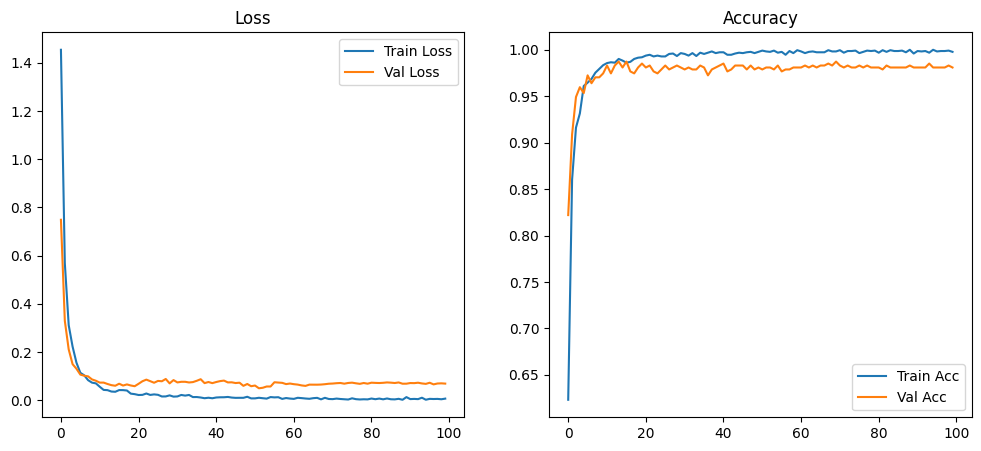

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses,label="Train Loss")
plt.plot(val_losses,label="Val Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies,label="Train Acc")
plt.plot(val_accuracies,label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.show()

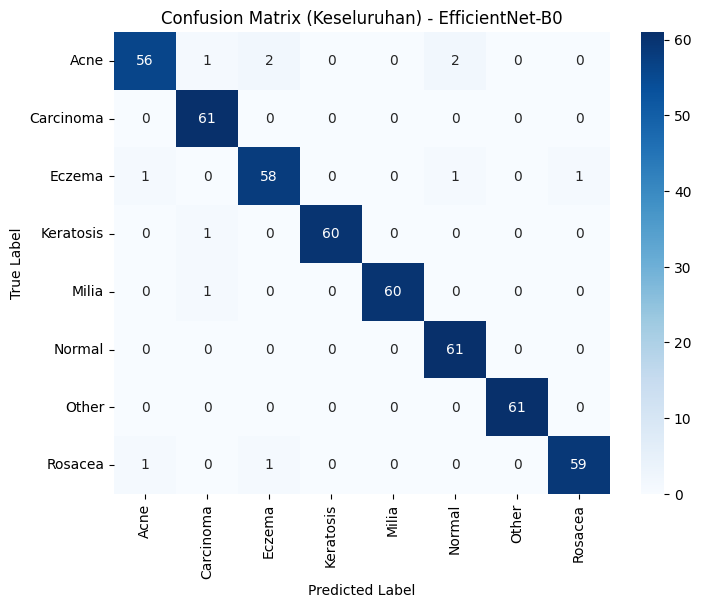

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.classes,
            yticklabels=test_data.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Keseluruhan) - EfficientNet-B0")
plt.show()

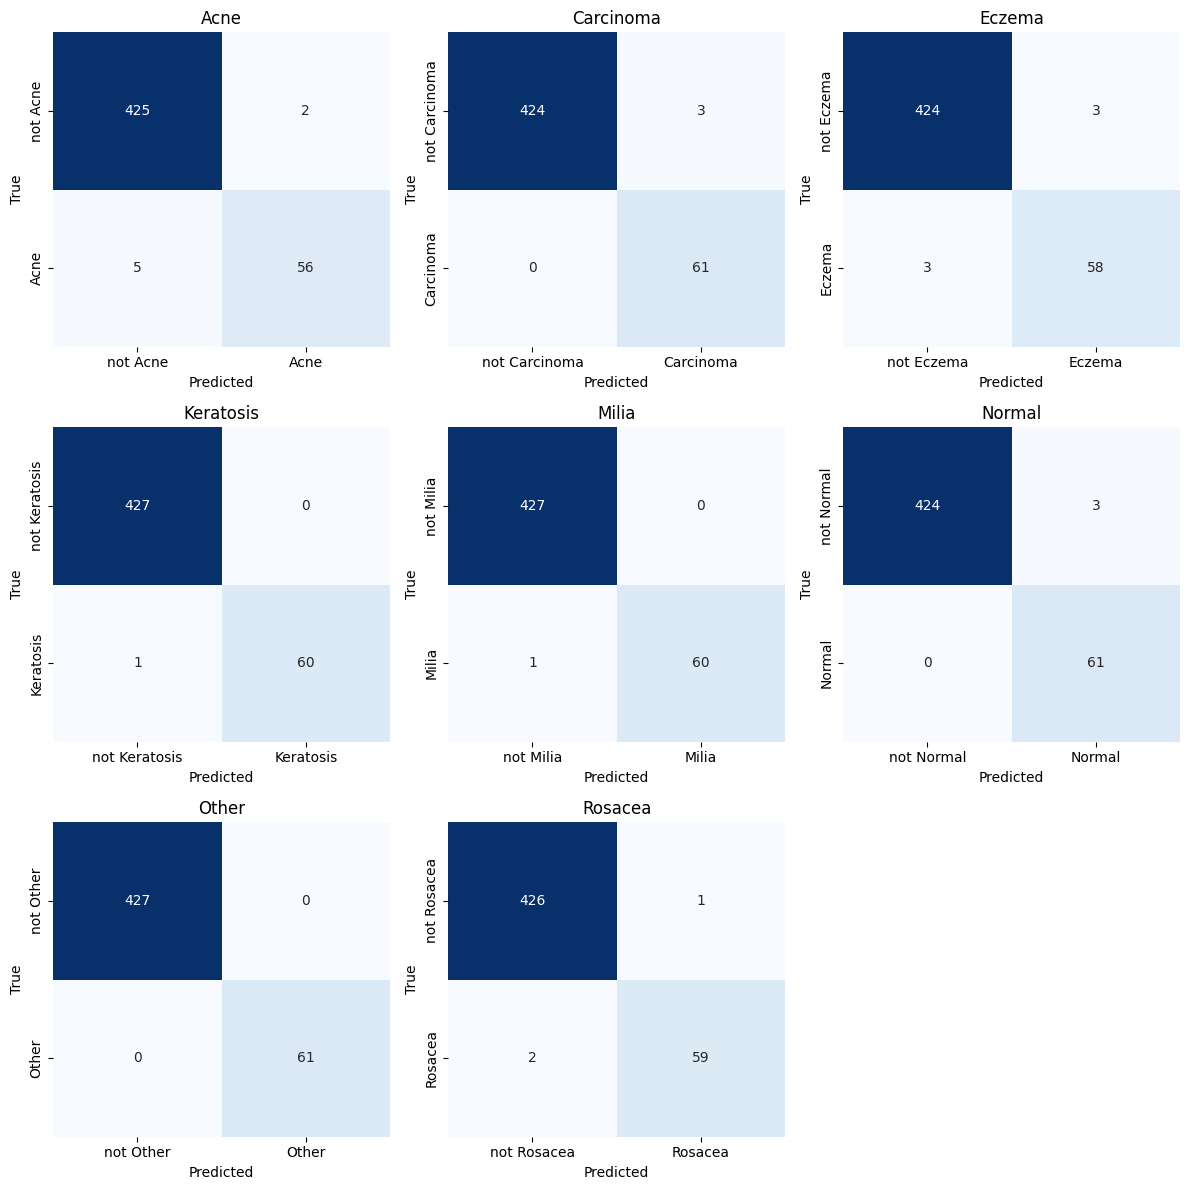

In [ ]:
num_classes = len(class_names)
cols = 3
rows = int(np.ceil(num_classes / cols))

plt.figure(figsize=(cols * 4, rows * 4))

for i, cls in enumerate(class_names):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    binary_cm = np.array([[TN, FP],
                           [FN, TP]])

    plt.subplot(rows, cols, i + 1)
    sns.heatmap(
        binary_cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=[f"not {cls}", cls],
        yticklabels=[f"not {cls}", cls]
    )
    plt.title(cls)
    plt.xlabel("Predicted")
    plt.ylabel("True")

plt.tight_layout()
plt.show()

In [ ]:
from torchvision import models
import torch.nn as nn

model_cpu = models.efficientnet_b0(weights=None)
model_cpu.classifier[1] = nn.Linear(
    model_cpu.classifier[1].in_features,
    num_classes
)

state_dict = torch.load(
    "/content/drive/MyDrive/Split_Skin/Model/Skin_EfficientNetB0.pth",
    map_location="cpu"
)
model_cpu.load_state_dict(state_dict)

model_cpu.eval()
model_cpu.to("cpu")

example_input = torch.randn(1, 3, 224, 224)

traced_script = torch.jit.trace(model_cpu, example_input)
traced_script.save("/content/drive/MyDrive/Split_Skin/Skin_EfficientNetB0.pt")

print("TorchScript EfficientNet-B0 berhasil disimpan!")

TorchScript EfficientNet-B0 berhasil disimpan!


# Model ResNet18 Pytorch

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
from torchvision.models import ResNet18_Weights

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

DATASET_PATH = "/content/drive/MyDrive/Split_Skin"

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 1e-4

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(8),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [ ]:
train_data = datasets.ImageFolder(
    os.path.join(DATASET_PATH, "train"),
    transform=train_transforms
)
val_data = datasets.ImageFolder(
    os.path.join(DATASET_PATH, "val"),
    transform=val_transforms
)
test_data = datasets.ImageFolder(
    os.path.join(DATASET_PATH, "test"),
    transform=val_transforms
)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(train_data.classes)
print("Classes:", train_data.classes)

Classes: ['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Normal', 'Other', 'Rosacea']


In [ ]:
def get_resnet18(num_classes):
    model = models.resnet18(weights=ResNet18_Weights.DEFAULT)

    # Freeze backbone
    for param in model.parameters():
        param.requires_grad = False

    # Unfreeze layer4 (fine-tuning ringan)
    for param in model.layer4.parameters():
        param.requires_grad = True

    # Ganti fully connected layer
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    return model.to(device)

model = get_resnet18(num_classes)

criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=EPOCHS, eta_min=1e-6
)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 198MB/s]


In [ ]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_acc = 0.0

save_path = "/content/drive/MyDrive/Split_Skin/Model/Skin_ResNet18.pth"

start_time = time.time()

for epoch in range(EPOCHS):

    # Train
    model.train()
    running_loss, running_corrects, total_train = 0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += (outputs.argmax(1) == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / total_train
    train_acc = running_corrects / total_train

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Valid
    model.eval()
    val_loss, val_corrects, total_val = 0, 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_corrects += (outputs.argmax(1) == labels).sum().item()
            total_val += labels.size(0)

    val_loss /= total_val
    val_acc = val_corrects / total_val

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"Model Saved! Best val_acc = {best_val_acc:.4f}")

    scheduler.step()

    print(f"Epoch [{epoch+1}/{EPOCHS}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2%} "
          f"|| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2%}")

end_time = time.time()
print(f"\nTotal Training Time: {end_time - start_time:.2f} seconds")

Model Saved! Best val_acc = 0.8962
Epoch [1/100] Train Loss: 0.7775 | Train Acc: 75.49% || Val Loss: 0.3258 | Val Acc: 89.62%
Model Saved! Best val_acc = 0.9407
Epoch [2/100] Train Loss: 0.2740 | Train Acc: 91.53% || Val Loss: 0.1793 | Val Acc: 94.07%
Model Saved! Best val_acc = 0.9576
Epoch [3/100] Train Loss: 0.1691 | Train Acc: 95.07% || Val Loss: 0.1330 | Val Acc: 95.76%
Model Saved! Best val_acc = 0.9597
Epoch [4/100] Train Loss: 0.1032 | Train Acc: 97.36% || Val Loss: 0.1419 | Val Acc: 95.97%
Model Saved! Best val_acc = 0.9640
Epoch [5/100] Train Loss: 0.0810 | Train Acc: 97.89% || Val Loss: 0.1010 | Val Acc: 96.40%
Epoch [6/100] Train Loss: 0.0668 | Train Acc: 98.16% || Val Loss: 0.1180 | Val Acc: 96.40%
Model Saved! Best val_acc = 0.9682
Epoch [7/100] Train Loss: 0.0621 | Train Acc: 98.07% || Val Loss: 0.1045 | Val Acc: 96.82%
Epoch [8/100] Train Loss: 0.0438 | Train Acc: 99.01% || Val Loss: 0.1140 | Val Acc: 95.97%
Epoch [9/100] Train Loss: 0.0373 | Train Acc: 98.92% || Val Lo

In [ ]:
model.load_state_dict(torch.load(save_path))
model.eval()

all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        all_preds.extend(outputs.argmax(1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

test_acc = (all_preds == all_labels).mean()
print(f"\nTest Accuracy ResNet18: {test_acc*100:.2f}%")


Test Accuracy ResNet18: 96.72%


In [ ]:
from sklearn.metrics import classification_report

print("\n Classification Report")
print(classification_report(all_labels, all_preds, target_names=train_data.classes, digits=4))


 Classification Report
              precision    recall  f1-score   support

        Acne     0.9322    0.9016    0.9167        61
   Carcinoma     0.9531    1.0000    0.9760        61
      Eczema     0.9828    0.9344    0.9580        61
   Keratosis     1.0000    0.9836    0.9917        61
       Milia     0.9839    1.0000    0.9919        61
      Normal     0.9385    1.0000    0.9683        61
       Other     1.0000    1.0000    1.0000        61
     Rosacea     0.9492    0.9180    0.9333        61

    accuracy                         0.9672       488
   macro avg     0.9674    0.9672    0.9670       488
weighted avg     0.9674    0.9672    0.9670       488



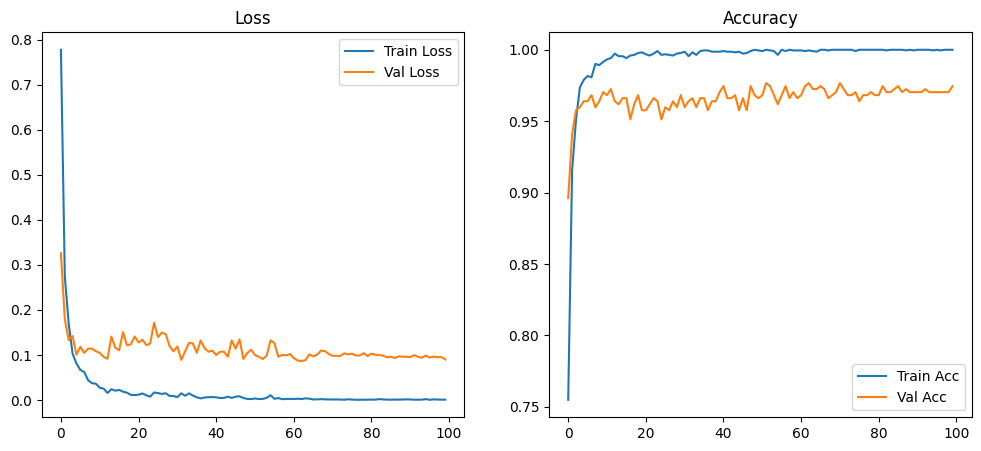

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses,label="Train Loss")
plt.plot(val_losses,label="Val Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies,label="Train Acc")
plt.plot(val_accuracies,label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.show()

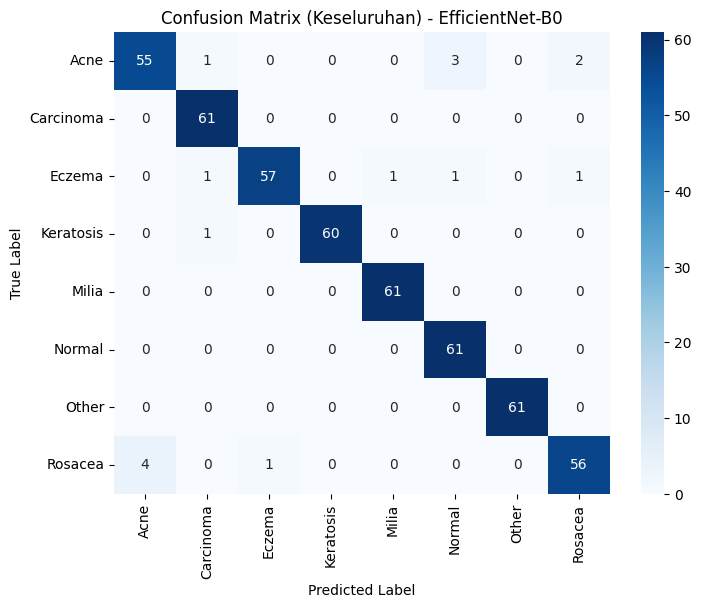

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.classes,
            yticklabels=test_data.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Keseluruhan) - EfficientNet-B0")
plt.show()

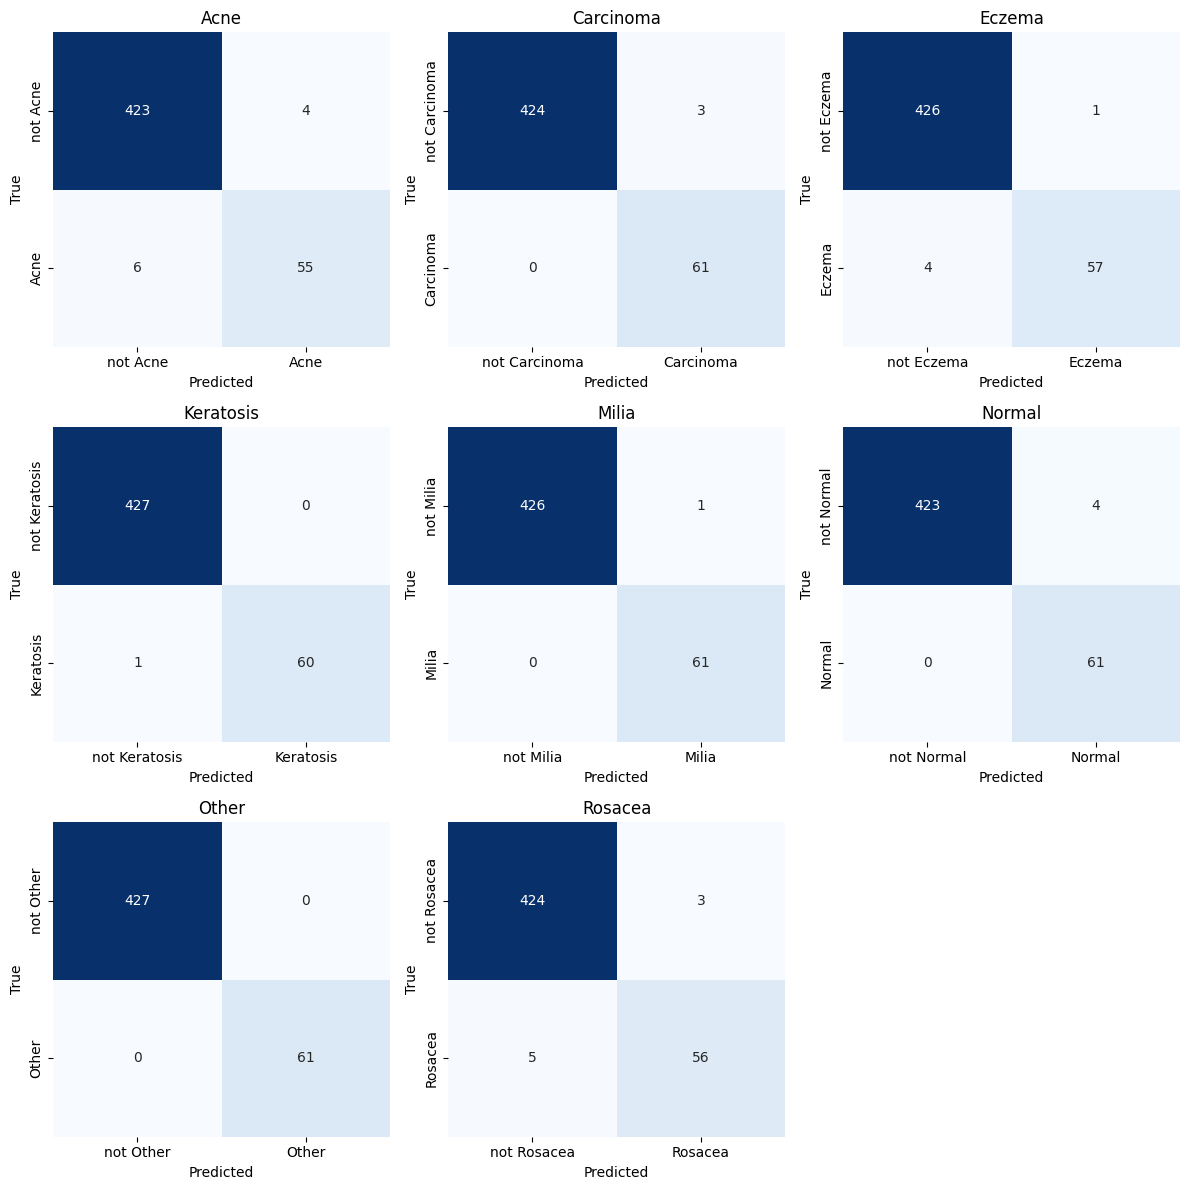

In [ ]:
num_classes = len(class_names)
cols = 3
rows = int(np.ceil(num_classes / cols))

plt.figure(figsize=(cols * 4, rows * 4))

for i, cls in enumerate(class_names):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    binary_cm = np.array([[TN, FP],
                           [FN, TP]])

    plt.subplot(rows, cols, i + 1)
    sns.heatmap(
        binary_cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=[f"not {cls}", cls],
        yticklabels=[f"not {cls}", cls]
    )
    plt.title(cls)
    plt.xlabel("Predicted")
    plt.ylabel("True")

plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

model_path = "/content/drive/MyDrive/Split_Skin/Model/Skin_ResNet18.pth"
output_path = "/content/drive/MyDrive/Split_Skin/Model/Skin_ResNet18.pt"

model_cpu = models.resnet18(weights=None)

model_cpu.fc = nn.Linear(
    model_cpu.fc.in_features,
    num_classes
)

state_dict = torch.load(model_path, map_location="cpu")
model_cpu.load_state_dict(state_dict)

model_cpu.eval()
model_cpu.to("cpu")

example_input = torch.randn(1, 3, 224, 224)

traced_script = torch.jit.trace(model_cpu, example_input)
traced_script.save(output_path)

print("TorchScript ResNet-18 berhasil disimpan!")

TorchScript ResNet-18 berhasil disimpan!


# MobileNetV2 Keras

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Split_Skin"

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 100

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "train"),
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "val"),
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "test"),
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

Found 1674 files belonging to 6 classes.
Found 354 files belonging to 6 classes.
Found 366 files belonging to 6 classes.
Classes: ['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Rosacea']


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.15),
    tf.keras.layers.RandomContrast(0.1),
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)
test_ds  = test_ds.prefetch(AUTOTUNE)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)

# Freeze seluruh backbone
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze 4 layer terakhir
for layer in base_model.layers[-4:]:
    layer.trainable = True

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

x = base_model(x, training=True)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[
        "accuracy",
        tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="top_3_acc")
    ]
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,790 (8.66 MB)

 Trainable params: 423,046 (1.61 MB)

 Non-trainable params: 1,847,744 (7.05 MB)

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/Split_Skin/Skin_MobileNetV2.keras",
        monitor="val_accuracy",
        save_best_only=True,
        verbose=0
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=0
    )
]

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.2961 - loss: 2.3017 - top_3_acc: 0.6512 - val_accuracy: 0.6299 - val_loss: 1.2285 - val_top_3_acc: 0.8898 - learning_rate: 1.0000e-04
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 246ms/step - accuracy: 0.6734 - loss: 1.2430 - top_3_acc: 0.9188 - val_accuracy: 0.7147 - val_loss: 1.0253 - val_top_3_acc: 0.9407 - learning_rate: 1.0000e-04
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - accuracy: 0.7495 - loss: 1.0486 - top_3_acc: 0.9532 - val_accuracy: 0.7486 - val_loss: 0.9690 - val_top_3_acc: 0.9520 - learning_rate: 1.0000e-04
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - accuracy: 0.7765 - loss: 0.9957 - top_3_acc: 0.9703 - val_accuracy: 0.7853 - val_loss: 0.9684 - val_top_3_acc: 0.9633 - learning_rate: 1.0000e-04
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 254ms/step - accuracy: 0.7968 - loss: 0.9336 - top_3_acc: 0.9714 - val_accuracy: 0.7910 - val_loss: 0.9417 - val_top_3_acc: 0.9661 - learning_rate: 1

In [ ]:
model.load_weights( "/content/drive/MyDrive/Split_Skin/Skin_MobileNetV2.keras")

test_loss, test_acc, test_top3 = model.evaluate(test_ds)

print(f"Test Accuracy   : {test_acc*100:.2f}%")
print(f"Test Top-3 Acc  : {test_top3*100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.9124 - loss: 0.6932 - top_3_acc: 0.9973
Test Accuracy   : 92.08%
Test Top-3 Acc  : 99.73%


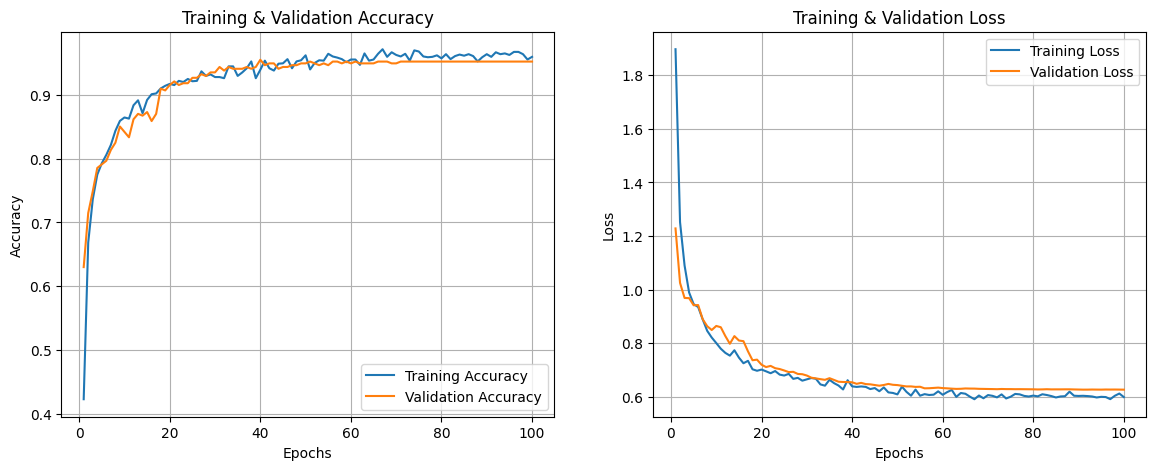

In [ ]:
import matplotlib.pyplot as plt

def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy Curve
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_training(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

        Acne     0.8358    0.9180    0.8750        61
   Carcinoma     0.9500    0.9344    0.9421        61
      Eczema     0.9273    0.8361    0.8793        61
   Keratosis     0.9667    0.9508    0.9587        61
       Milia     0.9355    0.9508    0.9431        61
     Rosacea     0.9194    0.9344    0.9268        61

    accuracy                         0.9208       366
   macro avg     0.9224    0.9208    0.9208       366
weighted avg     0.9224    0.9208    0.9208       

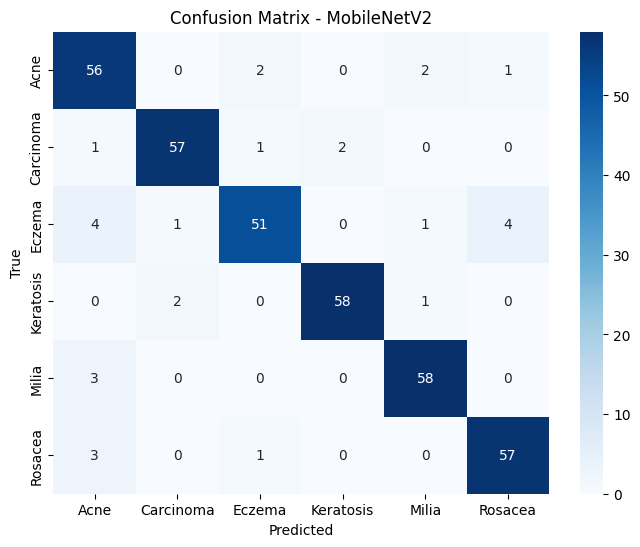

In [ ]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MobileNetV2")
plt.show()

In [ ]:
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Split_Skin/Skin_MobileNetV2.keras"
)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("/content/drive/MyDrive/Split_Skin/Skin_MobileNetV2.tflite", "wb") as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke TFLite!")

Saved artifact at '/tmp/tmp8khok0uc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133125465210128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465208208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465205712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465207824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465206864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465209552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465206672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465204368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465209936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133125465209360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1331254652097